# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


In [2]:
#!wget https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Crawler/Crawler_Linux_NoVis.zip
#!unzip -qo Crawler_Linux_NoVis.zip

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
env = UnityEnvironment(file_name='Crawler_Linux_NoVis/Crawler.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [  0.00000000e+00   0.00000000e+00   0.00000000e+00   2.25000000e+00
   1.00000000e+00   0.00000000e+00   1.78813934e-07   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   6.06093168e-01  -1.42857209e-01  -6.06078804e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.33339906e+00  -1.42857209e-01
  -1.33341408e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.000

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
steps=0
while True:
    steps+=1
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
print(steps)

Total score (averaged over agents) this episode: 0.3977684276178479
9


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [8]:
import copy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Implementation of Twin Delayed Deep Deterministic Policy Gradients (TD3)
# Paper: https://arxiv.org/abs/1802.09477


class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, max_action, hdlayer1=256, hdlayer2=128):
        super(Actor, self).__init__()

        self.l1 = nn.Linear(state_dim, hdlayer1)
        self.l2 = nn.Linear(hdlayer1, hdlayer2)
        self.l3 = nn.Linear(hdlayer2, action_dim)

        self.max_action = max_action


    def forward(self, state):
        a = F.relu(self.l1(state))
        a = F.relu(self.l2(a))
        return self.max_action * torch.tanh(self.l3(a))


class Critic(nn.Module):
    def __init__(self, state_dim, action_dim, hdlayer1=256, hdlayer2=64):
        super(Critic, self).__init__()

        # Q1 architecture
        self.l1 = nn.Linear(state_dim + action_dim, hdlayer1)
        self.l2 = nn.Linear(hdlayer1, hdlayer2)
        self.l3 = nn.Linear(hdlayer2, 1)

        # Q2 architecture
        self.l4 = nn.Linear(state_dim + action_dim, hdlayer1)
        self.l5 = nn.Linear(hdlayer1, hdlayer2)
        self.l6 = nn.Linear(hdlayer2, 1)


    def forward(self, state, action):
        sa = torch.cat([state, action], dim=1)

        q1 = F.relu(self.l1(sa))
        q1 = F.relu(self.l2(q1))
        q1 = self.l3(q1)

        q2 = F.relu(self.l4(sa))
        q2 = F.relu(self.l5(q2))
        q2 = self.l6(q2)
        return q1, q2


    def Q1(self, state, action):
        sa = torch.cat([state, action], 1)

        q1 = F.relu(self.l1(sa))
        q1 = F.relu(self.l2(q1))
        q1 = self.l3(q1)
        return q1

In [9]:
class SumTree:
    write = 0

    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.n_entries = 0

    # update to the root node
    def _propagate(self, idx, change):
        parent = (idx - 1) // 2

        self.tree[parent] += change

        if parent != 0:
            self._propagate(parent, change)

    # find sample on leaf node
    def _retrieve(self, idx, s):
        left = 2 * idx + 1
        right = left + 1

        if left >= len(self.tree):
            return idx

        if s <= self.tree[left]:
            return self._retrieve(left, s)
        else:
            return self._retrieve(right, s - self.tree[left])

    def total(self):
        return self.tree[0]

    # store priority and sample
    def add(self, p, data):
        idx = self.write + self.capacity - 1

        self.data[self.write] = data
        self.update(idx, p)

        self.write += 1
        if self.write >= self.capacity:
            self.write = 0

        if self.n_entries < self.capacity:
            self.n_entries += 1

    # update priority
    def update(self, idx, p):
        change = p - self.tree[idx]
        self.tree[idx] = p
        self._propagate(idx, change)

    # get priority and sample
    def get(self, s):
        idx = self._retrieve(0, s)
        dataIdx = idx - self.capacity + 1

        return (idx, self.tree[idx], self.data[dataIdx])

In [10]:
class ReplayBuffer:  # stored as ( s, a, r, s_ ) in SumTree
    e = 0.01
    a = 0.6
    beta = 0.4
    beta_increment_per_sampling = 0.001

    def __init__(self, capacity):
        self.tree = SumTree(capacity)
        self.capacity = capacity
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        
    def _get_priority(self, error):
        return (np.abs(error) + self.e) ** self.a

    def add(self, error, sample):
        p = self._get_priority(error)
        e = sample
        #e = self.experience(sample)
        self.tree.add(p, sample)

    def sample(self, n):
        batch = []
        idxs = []
        segment = self.tree.total() / n
        priorities = []

        self.beta = np.min([1., self.beta + self.beta_increment_per_sampling])

        for i in range(n):
            a = segment * i
            b = segment * (i + 1)

            s = np.random.uniform(a, b)
            (idx, p, data) = self.tree.get(s)
            priorities.append(p)
            batch.append(data)
            idxs.append(idx)

        sampling_probabilities = priorities / self.tree.total()
        is_weight = np.power(self.tree.n_entries * sampling_probabilities, -self.beta)
        is_weight /= is_weight.max()
        #print(is_weight.shape)
        is_weight = torch.from_numpy(is_weight).float().to(device)

        states = torch.from_numpy(np.vstack([e.state for e in batch if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in batch if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in batch if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in batch if e is not None])).float().to(device)
        not_dones = torch.from_numpy(np.vstack([(1 - e.done) for e in batch if e is not None]).astype(np.uint8)).float().to(device)
        
        batch = (states, actions, rewards, next_states, not_dones)

        return batch, idxs, is_weight

    def update(self, idx, error):
        p = self._get_priority(error)
        self.tree.update(idx, p)
        
    def size(self):
        return self.tree.n_entries

In [13]:

class TD3(object):
    def __init__(
        self,
        state_dim,
        action_dim,
        max_action,
        discount=0.99,
        tau=0.005,
        policy_noise=0.2,
        noise_clip=0.5,
        policy_freq=2
    ):

        self.actor = Actor(state_dim, action_dim, max_action).to(device)
        self.actor_target = copy.deepcopy(self.actor)
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr=3e-4)

        self.critic = Critic(state_dim, action_dim).to(device)
        self.critic_target = copy.deepcopy(self.critic)
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr=3e-4)

        self.max_action = max_action
        self.discount = discount
        self.tau = tau
        self.policy_noise = policy_noise
        self.noise_clip = noise_clip
        
        # for delay update
        self.policy_freq = policy_freq
        self.total_it = 0

        self.criticloss_hist = []
        self.actorloss_hist = []

    def select_action(self, state):
        state = torch.FloatTensor(state.reshape(1, -1)).to(device)
        return self.actor(state).cpu().data.numpy().flatten()

    def select_actions(self, states):
        actions = []
        for state in states:
            state = torch.FloatTensor(state.reshape(1, -1)).to(device)
            actions.append(self.actor(state).cpu().data.numpy().flatten())
        return actions

    def train(self, replay_buffer, batch_size=100):
        self.total_it += 1

        # Sample replay buffer 
        exp, idxs, is_weight = replay_buffer.sample(batch_size)
        state, action, reward, next_state, not_done = exp
        #print ( state.shape, action.shape, next_state.shape, reward.shape, not_done.shape)
        
        with torch.no_grad():
            # Select action according to policy and add clipped noise
            noise = (
                torch.randn_like(action) * self.policy_noise
            ).clamp(-self.noise_clip, self.noise_clip)

            #print (next_state.shape, noise.shape)
            next_action = (
                self.actor_target(next_state) + noise
            ).clamp(-self.max_action, self.max_action)

            # Compute the target Q value
            target_Q1, target_Q2 = self.critic_target(next_state, next_action)
            target_Q = torch.min(target_Q1, target_Q2)
            target_Q = reward + not_done * self.discount * target_Q

        # Get current Q estimates
        current_Q1, current_Q2 = self.critic(state, action)

        # Compute critic loss
        critic_loss = (F.mse_loss(current_Q1, target_Q) + F.mse_loss(current_Q2, target_Q)).mean()
        
        # Compute critic loss
        for Q1, Q2, TQ, idx, w in zip(current_Q1, current_Q2, target_Q, idxs, is_weight):
            loss = (F.mse_loss(Q1, TQ).detach() + F.mse_loss(Q2, TQ).detach()) * w
            replay_buffer.update(idx, loss)
        
        self.criticloss_hist.append(critic_loss)

        # Optimize the critic
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
        

        # Delayed policy updates
        if self.total_it % self.policy_freq == 0:

            # Compute actor losse
            actor_loss = -self.critic.Q1(state, self.actor(state)).mean()
            self.actorloss_hist.append(actor_loss)

            # Optimize the actor 
            self.actor_optimizer.zero_grad()
            actor_loss.backward()
            self.actor_optimizer.step()

            # soft copy the frozen target models
            for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
                target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

            for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
                target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)


    def save(self, filename):
        torch.save(self.critic.state_dict(), filename + "_critic")
        torch.save(self.critic_optimizer.state_dict(), filename + "_critic_optimizer")

        torch.save(self.actor.state_dict(), filename + "_actor")
        torch.save(self.actor_optimizer.state_dict(), filename + "_actor_optimizer")


    def load(self, filename):
        self.critic.load_state_dict(torch.load(filename + "_critic"))
        self.critic_optimizer.load_state_dict(torch.load(filename + "_critic_optimizer"))
        self.critic_target = copy.deepcopy(self.critic)

        self.actor.load_state_dict(torch.load(filename + "_actor"))
        self.actor_optimizer.load_state_dict(torch.load(filename + "_actor_optimizer"))
        self.actor_target = copy.deepcopy(self.actor)

        
    def error(self, state, action, reward, next_state, done):
        state = torch.from_numpy(state).float().to(device)
        next_state = torch.from_numpy(next_state).float().to(device)
        action = torch.from_numpy(action).float().to(device)
        critic_loss = []

        with torch.no_grad():
            # Select action according to policy and add clipped noise
            next_action = self.actor_target(next_state).clamp(-self.max_action, self.max_action)
            #print (next_action.shape, next_action.shape)

            # Compute the target Q value
            target_Q1, target_Q2 = self.critic_target(next_state, next_action)
            target_Q = torch.min(target_Q1, target_Q2)
            
            #target_Q = reward + (1-np.array(done)) * self.discount * target_Q
            target_Q = np.array(reward) + (1 - np.array(done)) * self.discount * target_Q.cpu().squeeze().numpy()
            
        target_Q = torch.from_numpy(target_Q).float().to(device)
        #print ("target_Q", target_Q.shape)
        
        # Get current Q estimates
        current_Q1, current_Q2 = self.critic(state, action)
        #print ("current_Q1, Q2 ", current_Q1.shape, current_Q2.shape)
        
        # Compute critic loss
        for Q1, Q2, TQ, in zip(current_Q1, current_Q2, target_Q):
            loss = F.mse_loss(Q1, TQ) + F.mse_loss(Q2, TQ)
            critic_loss.append(loss.detach())
        
        critic_loss = np.array(critic_loss)
        
        #critic_loss = (F.mse_loss(current_Q1, target_Q) + F.mse_loss(current_Q2, target_Q)).mean().detach().numpy()

        return critic_loss

In [14]:
from collections import namedtuple, deque

max_steps = 1001
start_timesteps = 50
batch_size = 256
expl_noise = 0.05
epochs = 2000
max_action = 1
print_every = 50

# Set seeds
torch.manual_seed(2)
np.random.seed(2)

policy = TD3(state_dim=state_size, action_dim=action_size, max_action=1 )

replay_buffer = ReplayBuffer(int(1e6))

# Evaluate untrained policy
#evaluations = [eval_policy(policy, args.env, args.seed)]
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)

episode_reward = 0
scores_deque = deque(maxlen=print_every)
scores = []

Experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
    
for i_episode in range(1, epochs+1):

    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    # Reset environment
    episode_reward = 0
            
    for t in range(max_steps):

        # Select action randomly or according to policy
        if t < start_timesteps and i_episode < 100:
            actions = np.random.normal(0, max_action, size=(len(states), action_size)).clip(-max_action, max_action)
        else:
            actions = (
                policy.select_actions(np.array(states))
                + np.random.normal(0, max_action * expl_noise, size=action_size)
            ).clip(-max_action, max_action)

        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        
        errs = policy.error(states, actions, rewards, next_states, dones)
        
        # Store data in replay buffer
        for state, action, reward, next_state, done, err in zip(states, actions, rewards, next_states, dones, errs):
            #err = policy.error(state, action, reward, next_state, done)
            exp = Experience(state, action, reward, next_state, done)
            replay_buffer.add(err, exp)
        
        states = next_states
        episode_reward += np.average(rewards)

        # Train agent after collecting sufficient data
        if replay_buffer.size() >= start_timesteps:
            policy.train(replay_buffer, batch_size)

        if np.any(dones): 
            break  
            
    scores_deque.append(episode_reward)
    scores.append(episode_reward)
    print('\rEpisode {}\tAverage Score: {:.3f}\tScore: {:.3f}\tSteps: {:.4f}'.format(i_episode, np.mean(scores_deque), t), end="")
    if i_episode % print_every == 0:    
        print('\rEpisode {}\tAverage Score: {:.3f}\tMax Score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.max(scores_deque)))  
        policy.save("actor_local")
    
    if np.mean(scores_deque) > 60:
        print('\rFinished at Episode {}\tReach Average Score: {:.2f}!'.format(i_episode, np.mean(scores_deque)))
        break
        
policy.save("actor_local")


Episode 50	Average Score: 0.49
Episode 100	Average Score: 0.81
Episode 150	Average Score: 0.93
Episode 200	Average Score: 3.43
Episode 250	Average Score: 6.44
Episode 300	Average Score: 14.06
Episode 350	Average Score: 16.98
Episode 400	Average Score: 17.91
Episode 450	Average Score: 21.47
Episode 500	Average Score: 26.44
Episode 550	Average Score: 24.70
Episode 600	Average Score: 27.39
Episode 650	Average Score: 30.57
Episode 700	Average Score: 33.96
Episode 750	Average Score: 35.69
Episode 800	Average Score: 36.69
Episode 850	Average Score: 38.78
Episode 900	Average Score: 36.84
Episode 950	Average Score: 36.65
Episode 1000	Average Score: 38.09
Episode 1050	Average Score: 37.73
Episode 1100	Average Score: 38.96
Episode 1150	Average Score: 39.00
Episode 1200	Average Score: 38.60
Episode 1250	Average Score: 41.84
Episode 1300	Average Score: 42.39
Episode 1350	Average Score: 42.15
Episode 1400	Average Score: 41.09
Episode 1450	Average Score: 42.03
Episode 1500	Average Score: 45.68
Episo

KeyboardInterrupt: 

In [17]:
policy.save("Crawler")

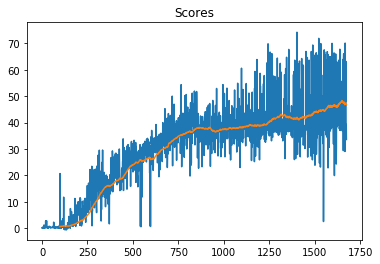

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scores(scores, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    plt.plot(scores); plt.title("Scores");
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean);
    return rolling_mean

rolling_mean = plot_scores(scores)